In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train=pd.read_csv("E:/Coding/Jupyter/train_values.csv")#TRAINING DATASETs
test=pd.read_csv("E:/Coding/Jupyter/test_values.csv")#TESTING DATASETS
train_labels=pd.read_csv("E:/Coding/Jupyter/train_labels.csv")#TRAINING LABELS


In [7]:
train.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [8]:
test.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [9]:
train.shape,test.shape

((180, 14), (90, 14))

In [10]:
train.columns,test.columns

(Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
        'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
        'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
        'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
        'max_heart_rate_achieved', 'exercise_induced_angina'],
       dtype='object'),
 Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
        'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
        'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
        'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
        'max_heart_rate_achieved', 'exercise_induced_angina'],
       dtype='object'))

In [11]:
train.describe(include='all'),test.describe(include='all')

(       patient_id  slope_of_peak_exercise_st_segment    thal  \
 count         180                         180.000000     180   
 unique        180                                NaN       3   
 top        gj1e5z                                NaN  normal   
 freq            1                                NaN      98   
 mean          NaN                           1.550000     NaN   
 std           NaN                           0.618838     NaN   
 min           NaN                           1.000000     NaN   
 25%           NaN                           1.000000     NaN   
 50%           NaN                           1.000000     NaN   
 75%           NaN                           2.000000     NaN   
 max           NaN                           3.000000     NaN   
 
         resting_blood_pressure  chest_pain_type  num_major_vessels  \
 count               180.000000       180.000000         180.000000   
 unique                     NaN              NaN                NaN   
 top 

In [12]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB
<

(None, None)

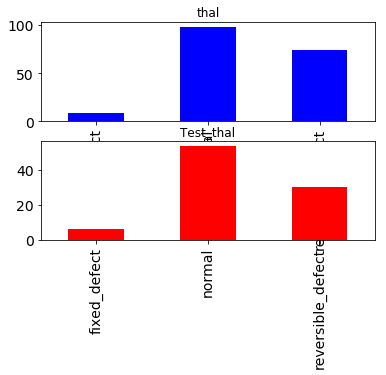

In [13]:
fig,axs=plt.subplots(2,1)
train.thal.value_counts().sort_index().plot.bar(title="thal",fontsize=14,color='b',ax=axs[0])
test.thal.value_counts().sort_index().plot.bar(title='Test_thal',fontsize=14,color='r',ax=axs[1])


Text(0,0.5,'Value_count')

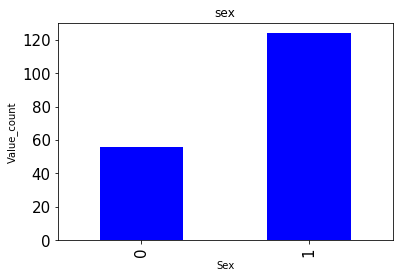

In [14]:
#GRAPHICAL REPRESENTATION FOR SEX TEST DATASETS
train.sex.value_counts().sort_index().plot.bar(title='sex',fontsize=15,color='b')
plt.xlabel('Sex')
plt.ylabel('Value_count')


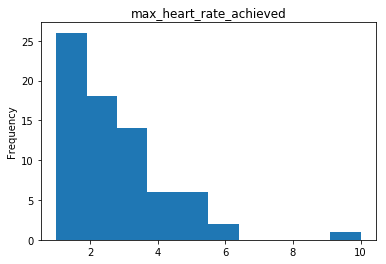

In [15]:
train.max_heart_rate_achieved.value_counts().plot.hist(title='max_heart_rate_achieved')


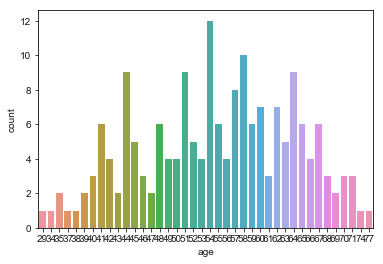

In [16]:
sns.countplot(train['age'])
sns.set(rc={"figure.figsize":(14,14)})


Text(0.5,0,'slope_of_peak_exercise_st_segment')

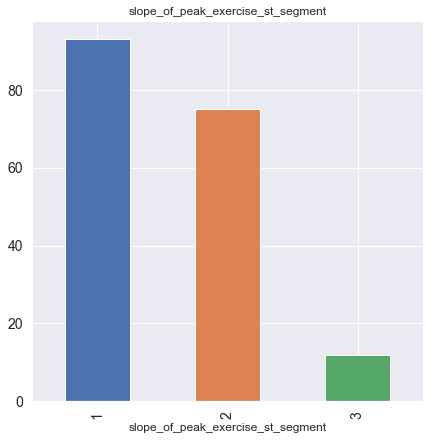

In [17]:
train.slope_of_peak_exercise_st_segment.value_counts().sort_index().plot.bar(title='slope_of_peak_exercise_st_segment',fontsize=14,figsize=(7,7))
plt.xlabel('slope_of_peak_exercise_st_segment')


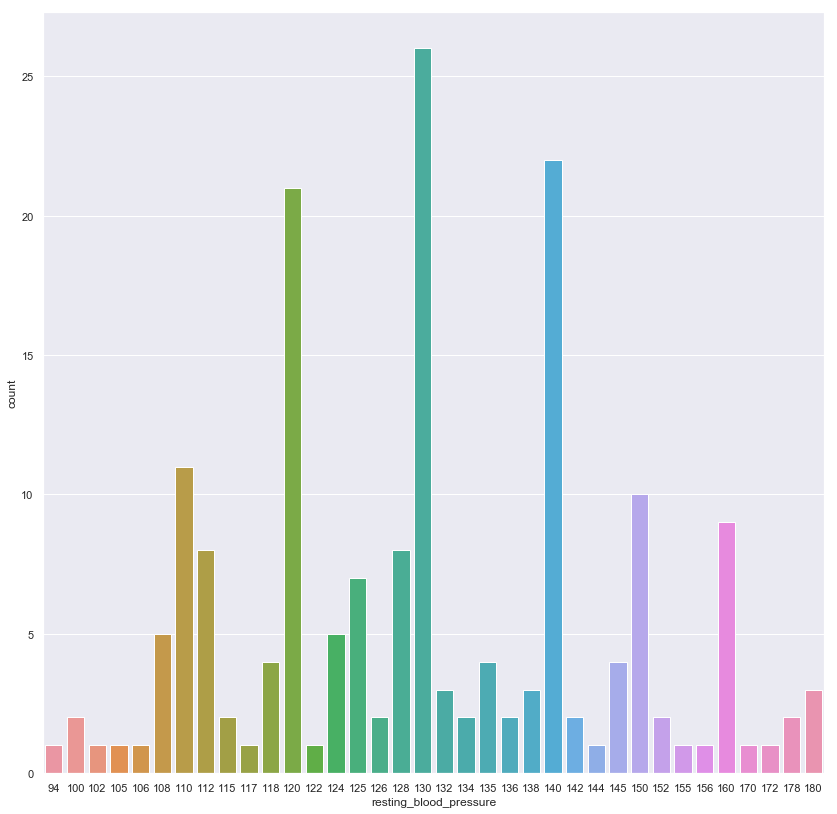

In [18]:
sns.countplot(train['resting_blood_pressure'])
sns.set(rc={'figure.figsize':(14,14)})
sns.set_style('ticks')


C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


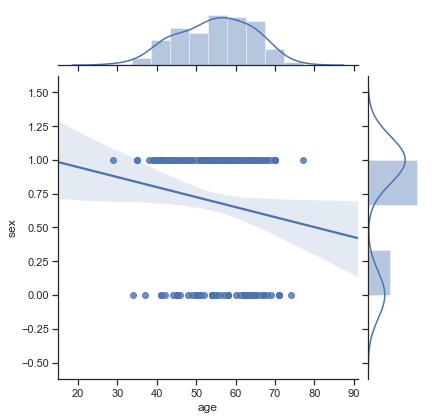

In [19]:
sns.jointplot(x='age',y='sex',data=train[train['age']<100],kind='reg')
sns.set(rc={'figure.figsize':(20,10)})


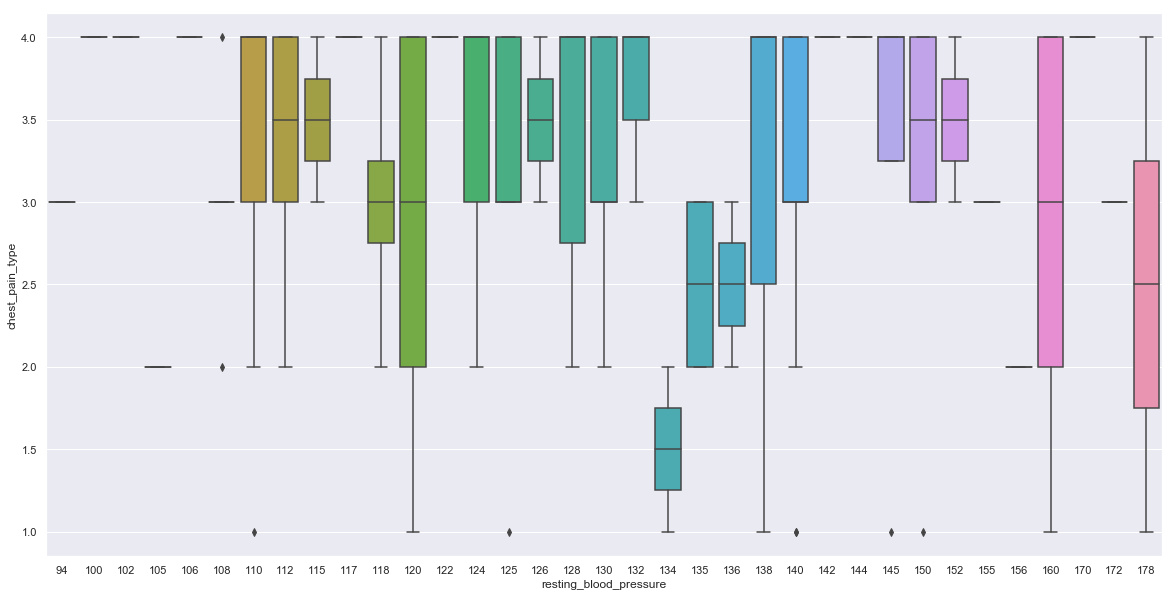

In [20]:
sns.boxplot(x='resting_blood_pressure',y='chest_pain_type',data=train[train['resting_blood_pressure']<180])
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')


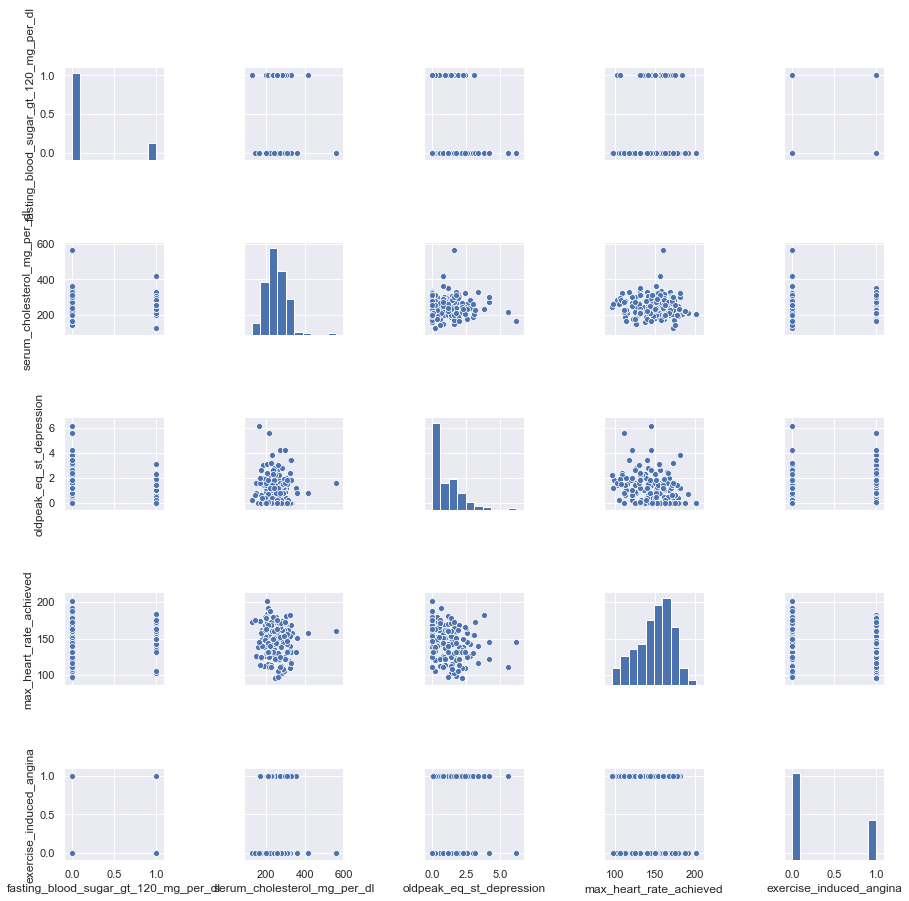

In [21]:
sns.pairplot(train[['fasting_blood_sugar_gt_120_mg_per_dl',
                    'serum_cholesterol_mg_per_dl', 
                    'oldpeak_eq_st_depression',
                    'max_heart_rate_achieved',
                    'exercise_induced_angina']])


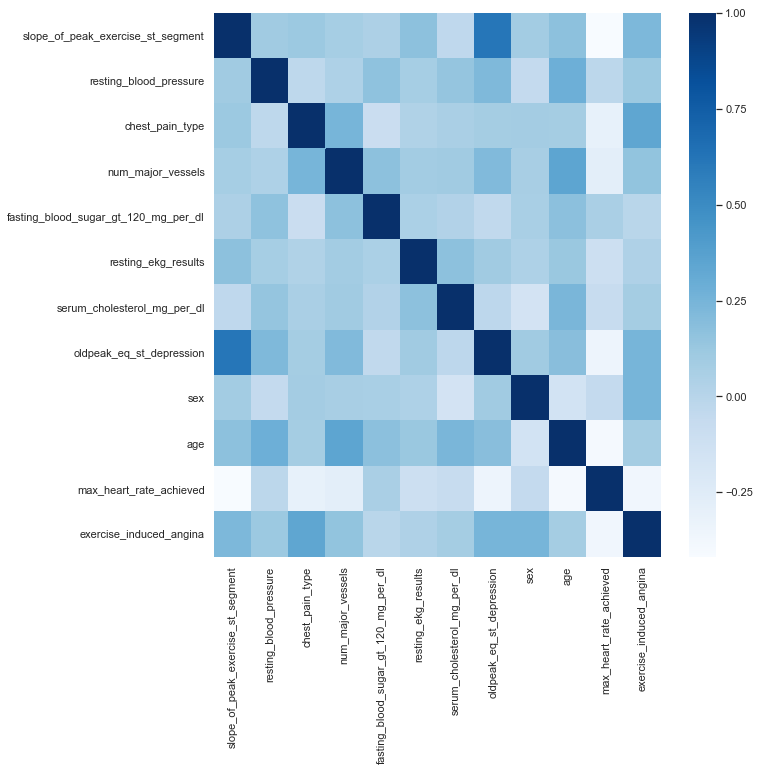

In [22]:
df=train[['slope_of_peak_exercise_st_segment',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']].corr()
sns.heatmap(df,cmap='Blues')


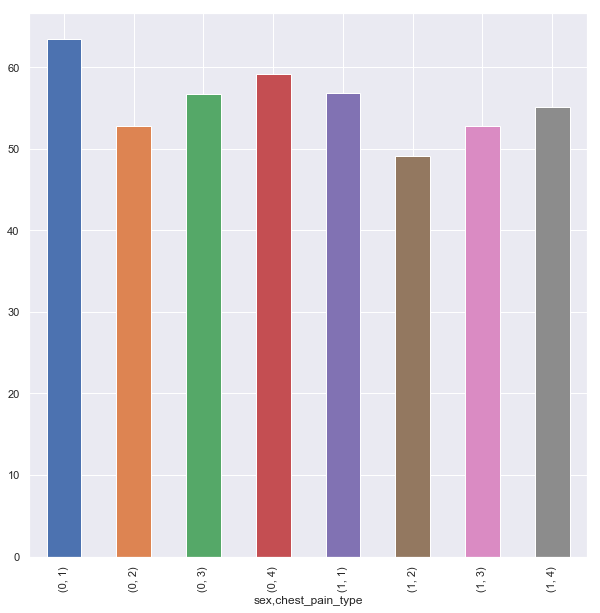

In [23]:
df1=train.groupby(['sex','chest_pain_type']).mean()['age']
df1.plot.bar(stacked=True)


In [24]:
df1.value_counts()


49.066667    1
55.095238    1
59.157895    1
52.828571    1
56.681818    1
56.818182    1
52.846154    1
63.500000    1
Name: age, dtype: int64

In [25]:
train.thal.value_counts()


normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [27]:
from sklearn import preprocessing
le_thal=preprocessing.LabelEncoder()
le_thal.fit(['normal','reversible_defect','fixed_defect'])
train['thal']=le_thal.transform(train['thal'])


C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


ValueError: y contains new labels: [0 1 2]

In [28]:
train

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,1,1,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,2,2,150,4,2,0,2,258,2.6,0,60,157,0
7,daa9kp,2,0,150,4,1,0,2,276,0.6,1,57,112,1
8,3nwy2n,3,2,170,4,0,0,2,326,3.4,1,59,140,1
9,1r508r,2,1,120,3,0,0,0,219,1.6,0,50,158,0


In [29]:
X=train[['slope_of_peak_exercise_st_segment', 'thal','resting_blood_pressure', 'chest_pain_type', 'num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results','serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age','max_heart_rate_achieved', 'exercise_induced_angina']]


In [30]:
from sklearn.cluster import KMeans
k_means=KMeans(init='k-means++',n_clusters=2,n_init=13)
k_means.fit(X)
labels=k_means.labels_
print(labels)


[1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0]


In [31]:
train["heart_disease_KMEANS"]=labels
train.head(5)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_KMEANS
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,1
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,0
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,1


Text(0,0.5,'Frequency')

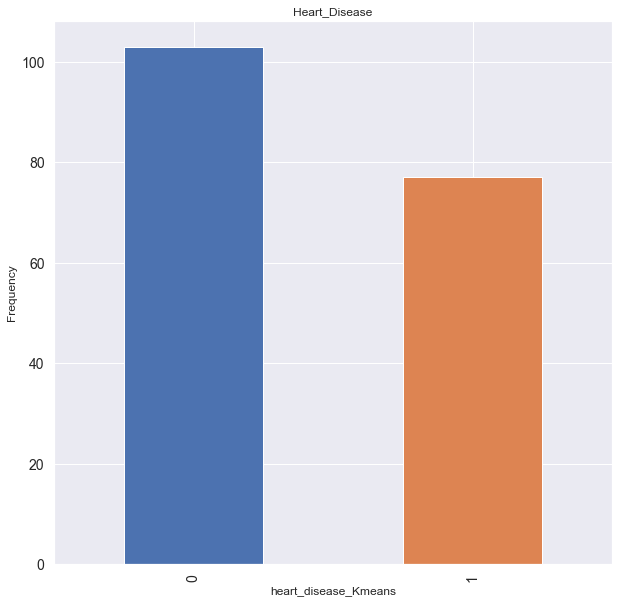

In [32]:
train.heart_disease_KMEANS.value_counts().sort_index().plot.bar(title='Heart_Disease',fontsize=14)
plt.xlabel('heart_disease_Kmeans')
plt.ylabel('Frequency')


In [34]:
DBSCAN CLUSTERING

SyntaxError: invalid syntax (<ipython-input-34-20c3f0c68727>, line 1)

In [35]:
from sklearn.cluster import DBSCAN
clustering=DBSCAN(eps=3,min_samples=2)
clustering.fit(X)
clustering.labels_
train['DBSCAN']=clustering.labels_


In [36]:
train


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_KMEANS,DBSCAN
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,1,-1
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0,-1
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1,-1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,0,-1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,1,-1
5,ldukkw,1,1,130,3,0,0,0,180,0.0,1,42,150,0,0,-1
6,2gbyh9,2,2,150,4,2,0,2,258,2.6,0,60,157,0,1,-1
7,daa9kp,2,0,150,4,1,0,2,276,0.6,1,57,112,1,1,-1
8,3nwy2n,3,2,170,4,0,0,2,326,3.4,1,59,140,1,1,-1
9,1r508r,2,1,120,3,0,0,0,219,1.6,0,50,158,0,0,-1


In [37]:
test.head(5)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [38]:
test.columns


Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [40]:
Y=test[['slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']]


In [41]:
from sklearn import preprocessing
le_thal=preprocessing.LabelEncoder()
le_thal.fit(['normal','reversible_defect','fixed_defect'])
test['thal']=le_thal.transform(test['thal'])


In [42]:
test_Y=test[['slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']]


In [43]:
from sklearn.cluster import KMeans
k_means_t=KMeans(init='k-means++',n_clusters=2,n_init=13)
k_means_t.fit(test_Y)
labels_t=k_means_t.labels_
print(labels_t)


[1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]


In [44]:
test["heart_disease_PRESENT"]=labels_t


In [45]:
test.head(5)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_PRESENT
0,olalu7,2,2,170,1,0,0,2,288,0.2,1,59,159,0,1
1,z9n6mx,1,1,138,4,0,0,0,183,1.4,0,35,182,0,0
2,5k4413,2,2,120,4,0,0,2,177,2.5,1,43,120,1,0
3,mrg7q5,1,1,102,3,1,0,0,318,0.0,0,60,160,0,1
4,uki4do,2,1,138,4,1,0,2,166,3.6,1,61,125,1,0


In [46]:
test.head(5)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_PRESENT
0,olalu7,2,2,170,1,0,0,2,288,0.2,1,59,159,0,1
1,z9n6mx,1,1,138,4,0,0,0,183,1.4,0,35,182,0,0
2,5k4413,2,2,120,4,0,0,2,177,2.5,1,43,120,1,0
3,mrg7q5,1,1,102,3,1,0,0,318,0.0,0,60,160,0,1
4,uki4do,2,1,138,4,1,0,2,166,3.6,1,61,125,1,0


In [47]:
df=test[['patient_id','heart_disease_PRESENT']]


In [48]:
df.to_csv('E:/Coding/Jupyter/heart_diseaseSubmission.csv')
